## DATA TRANSFORMATION ...week 4

### Exercise 1.

Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
Exercise 2.

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a displot or a histogram
varB
Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

Import transformers from the sklearn library from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
To reduce the skew and standardize a column, PowerTransformer from sklearn has two options (box-cox and yeo-johnson)
To rescale the column, use the MinMaxScaler transform.
Format the column correctly for the transformer. The sklearn transformers expect numpy.ndarray object types as input. To take a pandas column and transform it into the correct form for PowerTransform and Minmax_Scaler use the to_numpy() and reshape(-1,1) methods.

## Optional Task

check if there are highly correlated features and drop them (if there are any).


In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PowerTransformer


customer_data=pd.read_csv('customer_analysis.csv')

In [6]:
customer_data.head(),customer_data.tail()

(   unnamed:_0 customer       state  customer_lifetime_value response  \
 0           0  DK49336     Arizona              4809.216960       No   
 1           1  KX64629  California              2228.525238       No   
 2           2  LZ68649  Washington             14947.917300       No   
 3           3  XL78013      Oregon             22332.439460      Yes   
 4           4  QA50777      Oregon              9025.067525       No   
 
    coverage education effective_to_date employmentstatus gender  ...  \
 0     Basic   College        2011-02-18         Employed      M  ...   
 1     Basic   College        2011-01-18       Unemployed      F  ...   
 2     Basic  Bachelor        2011-02-10         Employed      M  ...   
 3  Extended   College        2011-01-11         Employed      M  ...   
 4   Premium  Bachelor        2011-01-17    Medical Leave      F  ...   
 
    number_of_policies     policy_type        policy  renew_offer_type  \
 0                   9  Corporate Auto  Corpor

In [7]:
# Identify categorical variables (excluding 'customer' and 'effective_to_date' as they are identifiers or dates)
categorical_cols = customer_data.select_dtypes(include=['object']).columns.drop(['customer', 'effective_to_date'])

# Apply One Hot Encoding with drop_first to avoid multicollinearity
ohe = OneHotEncoder(drop='first', sparse=False)
categorical_encoded = ohe.fit_transform(customer_data[categorical_cols])

# Convert the encoded categories back to a DataFrame for potential future use
categorical_encoded_customer_data = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols))


/Users/rachealnicholls/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# extracting numerical data in order to itirate.
# Select numerical columns, excluding 'unnamed:_0' as it seems to be an index or identifier
numerical_cols = customer_data.select_dtypes(include=['int64', 'float64']).columns.drop('unnamed:_0')
numericals_customer_data = customer_data[numerical_cols]

# Display the first few rows of the numerical data
numericals_customer_data.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2.0
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1.0
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2.0
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1.0
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1.0


In [17]:
## visually examining distributions (histograms) of the numerical features
# Select varA and varB based on the examination of distributions
# For varA, we selected 'total_claim_amount'
# For varB, we selected 'customer_lifetime_value'

# Apply MinMaxScaler to varA ('total_claim_amount')
varA = customer_data['total_claim_amount'].to_numpy().reshape(-1, 1)
minmax_scaler = MinMaxScaler()
varA_scaled = minmax_scaler.fit_transform(varA)



In [18]:
# Apply POWERTRANSFORMER to varB ('customer_lifetime_value') to reduce skew
varB = customer_data['customer_lifetime_value'].to_numpy().reshape(-1, 1)
power_transformer = PowerTransformer(method='yeo-johnson')
varB_transformed = power_transformer.fit_transform(varB)

# the Yeo Johnson method enables versatility, hence used here


In [21]:
# Check the transformations for varA
varA_min, varA_max = varA_scaled.min(), varA_scaled.max()

# Check the transformations for varB
varB_mean, varB_std = varB_transformed.mean(), varB_transformed.std()
varB_skew_before = pd.Series(varB.flatten()).skew()
varB_skew_after = pd.Series(varB_transformed.flatten()).skew()
# Print transformation results for verification
print(f"varA scaled range: {varA_min} to {varA_max}")
print(f"varB mean: {varB_mean}, std: {varB_std}, skew before: {varB_skew_before}, skew after: {varB_skew_after}")



varA scaled range: 0.0 to 0.9999999999999999
varB mean: 6.0792888850773214e-15, std: 1.0, skew before: 2.9100570833063877, skew after: 0.04667479646308277


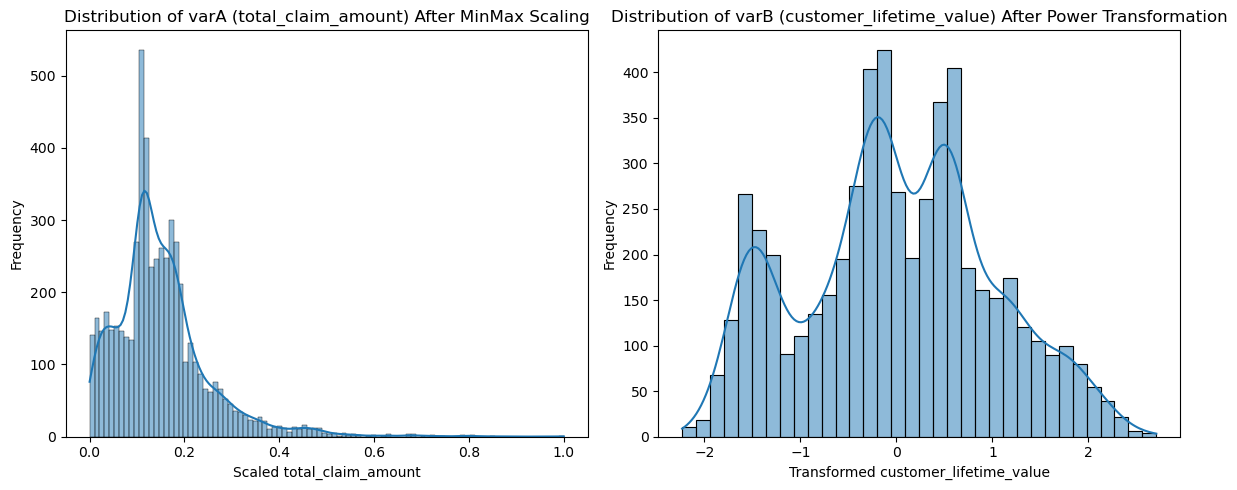

In [22]:
# plotting  the distribution for varA and varB after transformation

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for varA after MinMax scaling
sns.histplot(varA_scaled.flatten(), ax=ax[0], kde=True)
ax[0].set_title('Distribution of varA (total_claim_amount) After MinMax Scaling')
ax[0].set_xlabel('Scaled total_claim_amount')
ax[0].set_ylabel('Frequency')

# Plot for varB after Power Transformation
sns.histplot(varB_transformed.flatten(), ax=ax[1], kde=True)
ax[1].set_title('Distribution of varB (customer_lifetime_value) After Power Transformation')
ax[1].set_xlabel('Transformed customer_lifetime_value')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
## it is important to note that the data has been rescaled 
## to a specific range but the  distribution has not been impacted.
## The transformation helps in the preprocessing of the data in alignment 
## with most algorithm which require a normal distribution and standardized data. 

## Optional Bonus exercise
### calculating the correlation and deciding if any featues are to be dropped 

In [24]:
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame called customer_data
# You can calculate the correlation matrix for all numerical variables like this:

# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = customer_data.corr(numeric_only=True)

# Displaying the correlation matrix
print(correlation_matrix)

                               unnamed:_0  customer_lifetime_value    income  \
unnamed:_0                       1.000000                 0.001860 -0.001747   
customer_lifetime_value          0.001860                 1.000000  0.026719   
income                          -0.001747                 0.026719  1.000000   
monthly_premium_auto            -0.004931                 0.405724 -0.007605   
months_since_last_claim         -0.015232                 0.008941 -0.027297   
months_since_policy_inception    0.016412                 0.017506 -0.007934   
number_of_open_complaints        0.020413                -0.037357  0.001467   
number_of_policies              -0.004758                 0.018341  0.002150   
total_claim_amount               0.009421                 0.238282 -0.356727   
month                           -0.001776                -0.008683 -0.000128   

                               monthly_premium_auto  months_since_last_claim  \
unnamed:_0                             

In [ ]:
### the idea of the correlation matrix is to the goal is strictly to 
### eliminate highly correlated features to reduce dimensionality or multicollinearity 
### customer life value and monthly premium auto show a positive correlatio and wiill be kept
